In [1]:
import torch
import torch.nn.functional as F
from utils.encoding import labelMatrixOneHot

import matplotlib.pyplot as plt

from skimage.metrics import hausdorff_distance

In [25]:
def torch2D_Hausdorff_distance(x,y):
    """
    x,y: tensors of size [BxWxH]
    returns max distance between tensors
    
    function found here: https://github.com/gogoymh/Pytorch-Hausdorff-Distance/blob/main/hausdorff_distance.py
    """
    
    x = x.float()
    y = y.float()
    distance_matrix = torch.cdist(x,y,p=2) # p=2 means Euclidean Distance
    print(distance_matrix)
    value1 = distance_matrix.min(2)[0].max(1, keepdim=True)[0]
    value2 = distance_matrix.min(1)[0].max(1, keepdim=True)[0]

    value = torch.cat((value1, value2), dim=1)
    
    return value.max(1)[0]

def hausdorff_dist(outputs, labels, max_label):
    """
    outputs: prediction segmentation [HxW]
    labels: ground truth segmentation [HxW]
    max_label: int; label of classes including Background 
    
    return: torch.Tensor [num_labels -1] containing the HD between the labels Excluding BG
    """
    dist = torch.FloatTensor(max_label-1).fill_(0)
    B,H,W = outputs.shape
    
    for label in range(1, max_label):
        out_flat = (outputs==label).view(B,H,W).float()
        gt_flat = (labels==label).view(B,H,W).float()
        hd_dist = hausdorff_distance(out_flat.numpy(), gt_flat.numpy())
        dist[label-1] = hd_dist
    
    return dist

u = torch.Tensor([[[1.0, 2.0],
                   [0.0, 2.0]]])

v = torch.Tensor([[[0.0, 0.0],
                   [1.0, 2.0]]])

#print("Input shape is (B,W,H):", u.shape, v.shape)
#HD = torch2D_Hausdorff_distance(u,v)
#print("Hausdorff Distance is:", HD)
#HD2 = hausdorff_dist(u.squeeze(),v.squeeze(), 3)
#print("Hausdorff Distance is:", HD2)

In [3]:
segs = torch.load('/share/data_ultraschall/nicke_ma/data/train_segs_disp_6.pth') * 2

In [4]:
fixed_seg = segs[11][0]
moving_seg = segs[11][1]

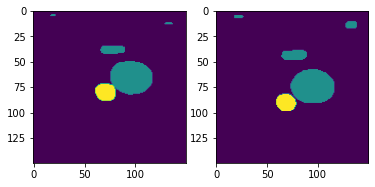

In [5]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(fixed_seg)
ax[1].imshow(moving_seg)

In [6]:
fixed_oh = labelMatrixOneHot(fixed_seg.unsqueeze(0), 3)
moving_oh = labelMatrixOneHot(moving_seg.unsqueeze(0), 3)

print(fixed_oh.shape, moving_oh.shape)
print(fixed_seg.shape, moving_seg.shape)

torch.Size([1, 3, 150, 150]) torch.Size([1, 3, 150, 150])
torch.Size([150, 150]) torch.Size([150, 150])


In [26]:
HD2 = hausdorff_dist(fixed_seg.unsqueeze(0),moving_seg.unsqueeze(0), 3)
print("Hausdorff Distance is:", HD2, HD2.mean())

Hausdorff Distance is: tensor([ 9.8489, 10.7703]) tensor(10.3096)
